In [2]:
import numpy as np
v = np.array([[1, 2, 3], [1, 2, 3]])
v[0, ::-1]

array([3, 2, 1])

In [ ]:
x, y = np.mgrid[0:5, 0:5]
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [ ]:
np.random.rand(0, 1)

array([], shape=(0, 1), dtype=float64)

In [14]:
np.zeros_like(x)

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]])

In [32]:
z = np.arange(0, 5)
z
np.dot(x, z).T == np.dot(x, z)

array([ True,  True,  True,  True,  True], dtype=bool)

In [39]:
m = np.matrix(y)
np.linalg.det(m)

0.0

In [15]:
from scipy.interpolate import *
from scipy import sin

In [ ]:
def f(x):
    return sin(x)

In [55]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise
y_real = f(x)
# print(y_meas)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)
print(linear_interpolation, y_interp1)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

<scipy.interpolate.interpolate.interp1d object at 0x000002260F4F5AE8> [ 0.17611989  0.24805812  0.31999634  0.39193456  0.46387279  0.53581101
  0.60774923  0.67968746  0.75162568  0.82356391  0.89550213  0.96744035
  0.95263329  0.93782623  0.92301917  0.90821211  0.89340505  0.87859799
  0.86379093  0.84898387  0.8341768   0.81936974  0.80456268  0.73900245
  0.67344222  0.60788199  0.54232176  0.47676153  0.4112013   0.34564107
  0.28008084  0.21452061  0.14896038  0.08340015  0.01403853 -0.05532309
 -0.12468471 -0.19404633 -0.26340795 -0.33276957 -0.40213119 -0.47149282
 -0.54085444 -0.61021606 -0.67957768 -0.72284281 -0.76610793 -0.80937306
 -0.85263818 -0.89590331 -0.93916844 -0.98243356 -1.02569869 -1.06896381
 -1.11222894 -1.15549407 -1.09163855 -1.02778304 -0.96392752 -0.90007201
 -0.8362165  -0.77236098 -0.70850547 -0.64464996 -0.58079444 -0.51693893
 -0.45308342 -0.36170929 -0.27033516 -0.17896103 -0.08758691  0.00378722
  0.09516135  0.18653547  0.2779096   0.36928373  0.46

In [1]:
print("shit")

shit


In [13]:
from sympy import *

init_printing()


Z = Symbol('Z')  # depth starting from bottom
T0 = Symbol('T0')  # 井底处流体温度 
Tr = Symbol('Tr')  # 油层中部温度 摄氏度
density_of_oil = Symbol('ρ')  # kg/m3
Cp = Symbol('Cp')  # 定压比热容 J/(kg*K)
W = Symbol('W')  # 质量流量 kg/s
LR = Symbol('LR')  # 半稳态法得到的计算参数
m = Symbol('m')  # 地温梯度
qv = Symbol('qv')  # 单位长度流体内热源强度 W/m
g = Symbol('g')  # 重力加速度 m/s^2
fi = Symbol('∅')  # 包含了动能项和焦耳-汤姆逊系数（J--T）的计算参数


power_of_exp = -LR / (W * Cp) * Z
Tz = (T0 - Tr) * exp(power_of_exp) \
     + (1 - exp(power_of_exp)) * (m - g / Cp + fi) / LR \
     + Tr - m * Z

Tz

                               ⎛     -LR⋅Z ⎞             
                               ⎜     ──────⎟             
                      -LR⋅Z    ⎜      Cp⋅W ⎟ ⎛        g ⎞
                      ──────   ⎝1 - ℯ      ⎠⋅⎜m + ∅ - ──⎟
                       Cp⋅W                  ⎝        Cp⎠
Tr - Z⋅m + (T₀ - Tr)⋅ℯ       + ──────────────────────────
                                           LR            

In [11]:
from sympy import *


class OilTemperature:
    def __init__(self):
        # 地层温度表达式
        self.init_symbols_expr()

        # 替换计算参数 LR
        self.subs_symbol_LR()
        
        self.subs_symbol_Ufe()
        self.subs_symbol_TD()

    def init_symbols_expr(self):
        # depth starting from bottom
        self.Z = Symbol('Z')
        # 井底处流体温度
        self.T0 = Symbol('T0')
        # 油层中部温度 摄氏度
        self.Tr = Symbol('Tr')
        # kg/m3
        self.density_of_oil = Symbol('ρ')
        # 定压比热容 J/(kg*K)
        self.Cp = Symbol('Cp')
        # 质量流量 kg/s
        self.W = Symbol('W')
        # 半稳态法得到的计算参数
        self.LR = Symbol('LR')
        # 地温梯度
        self.m = Symbol('m')
        # 单位长度流体内热源强度 W/m
        self.qv = Symbol('qv')
        # 重力加速度 m/s^2
        self.g = Symbol('g')
        # 包含了动能项和焦耳-汤姆逊系数（J--T）的计算参数
        self.fi = Symbol('∅')
        self.power_of_exp = -self.LR / (self.W * self.Cp) * self.Z

        # Tz
        self.expr = (self.T0 - self.Tr) * exp(self.power_of_exp) \
                    + (1 - exp(self.power_of_exp)) * (self.m - self.g / self.Cp + self.fi) * self.W * self.Cp / self.LR \
                    + self.Tr - self.m * self.Z

    def subs_symbol_LR(self):
        # 替换计算参数 LR

        # 油管内径
        self.rti = Symbol('rti')

        # 导热系数
        self.Ke = Symbol('Ke')

        # 该微元段传热系数
        self.Ufe = Symbol('Ufe')

        # 无因此地层温度
        self.TD = Symbol('TD')

        # rti?
        LR = 2 * pi * self.rti * self.Ufe * self.Ke / (self.Ke + self.rti * self.Ufe * self.TD)

        self.expr = self.expr.subs(self.LR, LR)

    def subs_symbol_Ufe(self):
        # K 导热系数，下标 t-油管，a-环空，c-套管 cem-水泥环
        # 油管内壁对流换热系数
        self.h = Symbol('h')

        self.rto = Symbol('rto')

        self.Kt = Symbol('Kt')

        self.Ka = Symbol('Ka')
        self.rc1i = Symbol('rc1i')
        self.Kc = Symbol('Kc')
        self.rc1o = Symbol('rc1o')
        self.rc2i = Symbol('rc2i')
        self.rc2o = Symbol('rc2o')
        self.rc3i = Symbol('rc3i')
        self.rc3o = Symbol('rc3o')
        self.Kcem = Symbol('Kcem')
        self.rcem = Symbol('rcem')

        Ufe = 1 / \
              (1 / self.h
               + self.rti / self.Kt * ln(self.rto / self.rti)
               + self.rti / self.Ka * ln(self.rc1i / self.rto)
               + self.rti / self.Kc * ln(self.rc1o / self.rc1i)
               + self.rti / self.Ka * ln(self.rc2i / self.rc1o)
               + self.rti / self.Kc * ln(self.rc2o / self.rc2i)
               + self.rti / self.Ka * ln(self.rc3i / self.rc2o)
               + self.rti / self.Kc * ln(self.rc3o / self.rc3i)
               + self.rti / self.Kcem * ln(self.rcem / self.rc3o)
               )
        self.expr.subs(self.Ufe, Ufe)

    def subs_symbol_TD(self):
        self.t = Symbol('t')

        # 地层热扩散系数
        self.ae = Symbol('ae')

        # 井筒尺寸
        self.rw = Symbol('rw')

        td = self.t * self.ae / self.rw ** 2

        TD = ln(exp(-0.2 * td) +
                (1.5 - 0.3719 * exp(-td)) * sqrt(td))

        self.expr.subs(self.TD, TD)
        
        
        
init_printing()
oil_temp = OilTemperature()
oil_temp.expr

     ⎛       -2⋅π⋅Ke⋅Ufe⋅Z⋅rti   ⎞                                            
     ⎜     ──────────────────────⎟                                            
     ⎜     Cp⋅W⋅(Ke + TD⋅Ufe⋅rti)⎟                   ⎛        g ⎞             
Cp⋅W⋅⎝1 - ℯ                      ⎠⋅(Ke + TD⋅Ufe⋅rti)⋅⎜m + ∅ - ──⎟             
                                                     ⎝        Cp⎠             
───────────────────────────────────────────────────────────────── + Tr - Z⋅m +
                          2⋅π⋅Ke⋅Ufe⋅rti                                      

                                  
                                  
              -2⋅π⋅Ke⋅Ufe⋅Z⋅rti   
            ──────────────────────
            Cp⋅W⋅(Ke + TD⋅Ufe⋅rti)
 (T₀ - Tr)⋅ℯ                      
                                  

In [14]:
from sympy import *
from sympy.abc import x, y
import numpy
expr = Piecewise((-10, x < 0), (ln(x), x >= 8), (10, True))
# expr = x ** 2
f = lambdify(x, expr, 'numpy')
f([-1, 10])

C:\Program Files\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in log
  """


array([-10.        ,   2.30258509])

In [30]:
from sympy import *
from sympy.abc import x
import numpy
import operator
left = 10
right = 12
expr = Piecewise((10, x < 12), (5, x > 10), (0, True))
# expr = x ** 2
f = lambdify(x, expr, 'numpy')
r = numpy.arange(0, 100)
print(r)
f(r)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


array([ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.])

In [20]:
from sympy import Symbol, sqrt
from numpy import array
a = Symbol('a')
b = Symbol('b')
expr1 = (a + 1) ** 2
expr2 = a ** 2 + 2 * sqrt(a * 10) + ln(a) + b
f = lambdify(a, expr2, 'numpy')
print(f(array([10])))
expr1.subs(a, 10)
print(expr1)

b + 122.302585092994
(a + 1)**2


In [3]:
def shit(*args):
    print(args, type(args))
    
    
a = [1, 2, 3, 4, 5, 6]  
shit(*a)

(1, 2, 3, 4, 5, 6) <class 'tuple'>


In [22]:
x = Symbol('x')
expr = x + 1
expr.subs(x, 2)
print(expr)

x + 1


In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
a = np.arange(0, 3861, 1)
# fig = plt.figure()
# axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# axes.plot(a, a, 'r')
# axes.set_xlabel('x')
# axes.set_ylabel('y')
# axes.set_title('title')
# fig.show()
prin

[   0    1    2 ..., 3858 3859 3860]


array([], dtype=int32)

In [2]:
class A:
    def __init__(self):
        self.a = 'a'   
   
     
class C:
    def __init__(self):
        pass
    
    def print_a(self):
        print(self.a)
        
        
class B(A, C):
    def __init__(self):
        super().__init__()
        
b = B()
b.print_a()

a


In [53]:
import numpy as np
c = np.array([[1, 2, 3],
              [1, 2, 3],
              [1, 2, 3],
              [1, 2, 3],
              [1, 2, 3]])
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 3])
c * a * b

ValueError: operands could not be broadcast together with shapes (5,3) (5,) 

In [49]:
temp = np.ma.array([
        1, 2, 3, 4, 5, 6, 7,
    ])
print(temp[1])
print(np.prod(temp))
temp[1] = np.ma.masked
print(np.prod(temp))
temp[1]

2
5040
2520


masked

In [50]:
np.product([-48.65, -23.825, -15.55, -11.4125, -7.275, -4.841176470588235])

7244540.5777176963

In [61]:
def sumproducts(x, y):
    result = 0
    for i in range(len(x)):
        for j in range(len(y)):
            result += x[i] * y[j]
    return result

a = np.arange(3000, dtype=float)
b = np.arange(3000, dtype=float)
print(sumproducts(a, b))
print(np.sum(a))
print(np.sum(a) * np.sum(b))

2.023650225e+13
4498500.0
2.023650225e+13


In [62]:
4498500.0 * 4498500.0

20236502250000.0

8640000 79.2020207514


0 56.3191042454


864000 71.3338444929


1728000 73.7124140093


2592000 75.1259829901


3456000 76.1256761627


4320000 76.8930565612


5184000 77.5123127224


6048000 78.0295147684


6912000 78.472492123


7776000 78.8592424538


8640000 79.2020207514


12960000 80.4934251297


17280000 81.3836502436


21600000 82.0597471185


25920000 82.603037797


30240000 83.0561108205


34560000 83.4440121138


38880000 83.7826957119


43200000 84.0829376527


47520000 84.3523511229


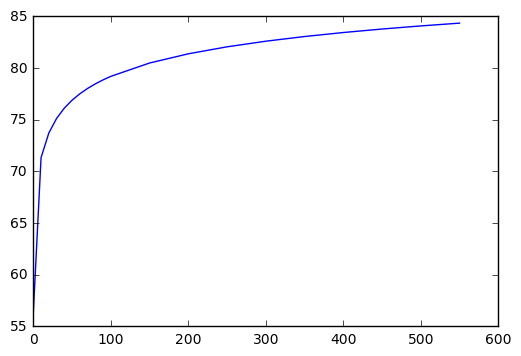

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from Params import Params
from OilTemp import OilTemp
from AnnularTemp import AnnularTemp

params = Params()

p = params.params

oil_temp = OilTemp(p)
oil_temp.load_params()
oil_temp.run()
# oil_temp.plot()
print(oil_temp.params['etc']['t'], oil_temp.temps_in_C[-1])
annular_temp = AnnularTemp(p, oil_temp.temps_in_K, oil_temp.zindex)
annular_temp.run()
# annular_temp.plot()

t = np.concatenate((np.arange(0, 100, 10), np.arange(100, 600, 50)))
r = []
for i in t:
    params.set_time_day(i)
    ot = OilTemp(params.params)
    ot.load_params()
    ot.run()
    # at = AnnularTemp(params, ot.temps_in_K, ot.zindex)
    # at.run()
    # r
    print(params.params['etc']['t'], ot.temps_in_C[-1])
    r.append(ot.temps_in_C[-1])

plt.figure()   
plt.plot(t, r)
plt.show()